In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
train = pd.read_csv('./data/train.csv',header=0)
test = pd.read_csv('./data/test.csv',header=0)

/tmp/ipykernel_12960/3240243474.py:2: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./data/train.csv',header=0)


In [4]:
print(f'Training data have {train.shape[0]} rows and {train.shape[1]} cols')
print(f'Training data have {test.shape[0]} rows and {test.shape[1]} cols')

Training data have 177024 rows and 508 cols
Training data have 3644 rows and 507 cols


In [5]:
# date conversion
train.time = pd.to_datetime(train.time, format='%H:%M:%S')
test.time = pd.to_datetime(test.time, format='%H:%M:%S')

train['hour'] = train['time'].dt.hour
test['hour'] = test['time'].dt.hour

train['time_min'] = train['time'].dt.hour * 60 + train['time'].dt.minute
test['time_min'] = test['time'].dt.hour * 60 + test['time'].dt.minute

In [6]:
def calc_missing_ratio(df, cols, group_by_col):
    def calc_missing_ratio_per_group(group):
        total_values = df[cols].size  
        missing_values = group[cols].isna().sum().sum()  
        missing_ratio = (missing_values / total_values) * 100  
        return missing_ratio
    
    missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)
    
    return missing_ratio_per_group

In [7]:
def plot_missing_ratio(df, cols, group_by_col, title):
    missing_ratio = calc_missing_ratio(df, cols, group_by_col)
    
    # barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_ratio.index, y=missing_ratio)
    plt.xlabel(group_by_col)
    plt.ylabel('Missing ratio (%)')
    plt.title(f'Missing ratio of {title} columns per {group_by_col}')
    
    # Add missing ratio text on each bar
    for index, value in enumerate(missing_ratio):
        plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
    
    plt.show()

##### bg NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


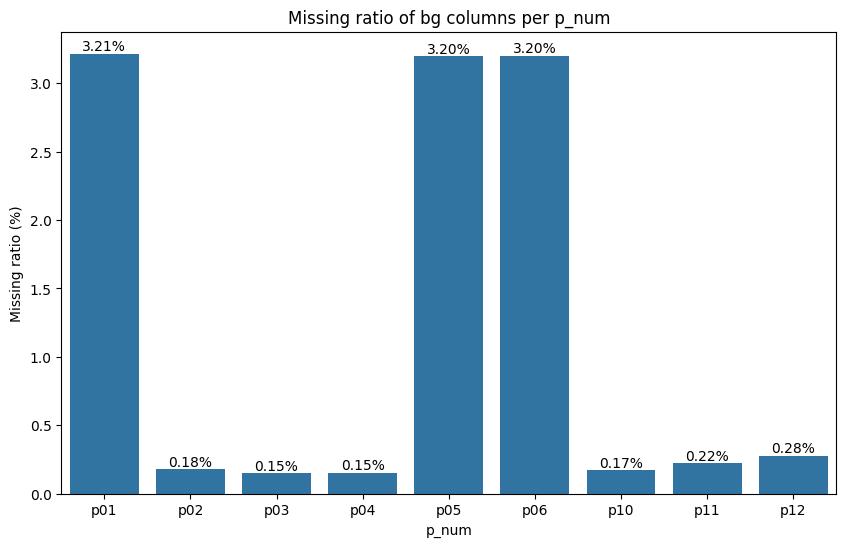

In [8]:
bg_cols = [col for col in train.columns if col.startswith('bg-')]
plot_missing_ratio(train, bg_cols, 'p_num', 'bg')

#### insulin NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


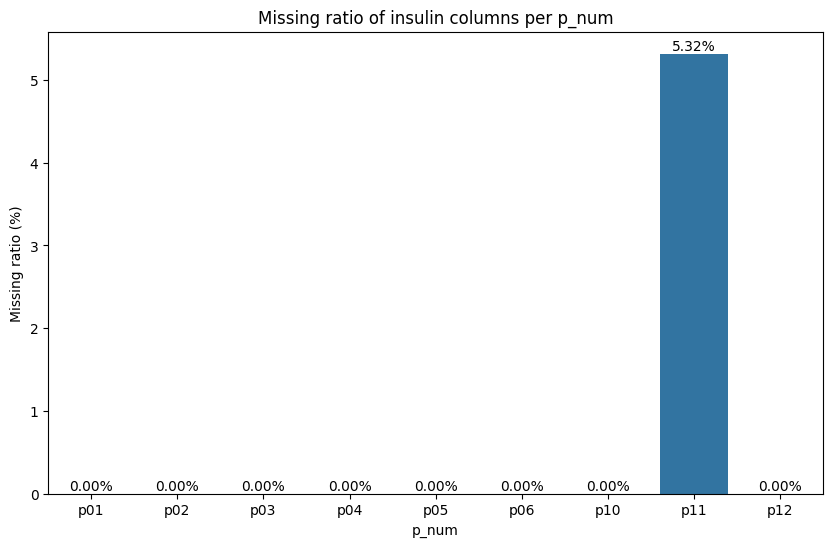

In [9]:

insulin_cols = [col for col in train.columns if col.startswith('insulin-')]
plot_missing_ratio(train, insulin_cols, 'p_num', 'insulin')

#### carbs NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


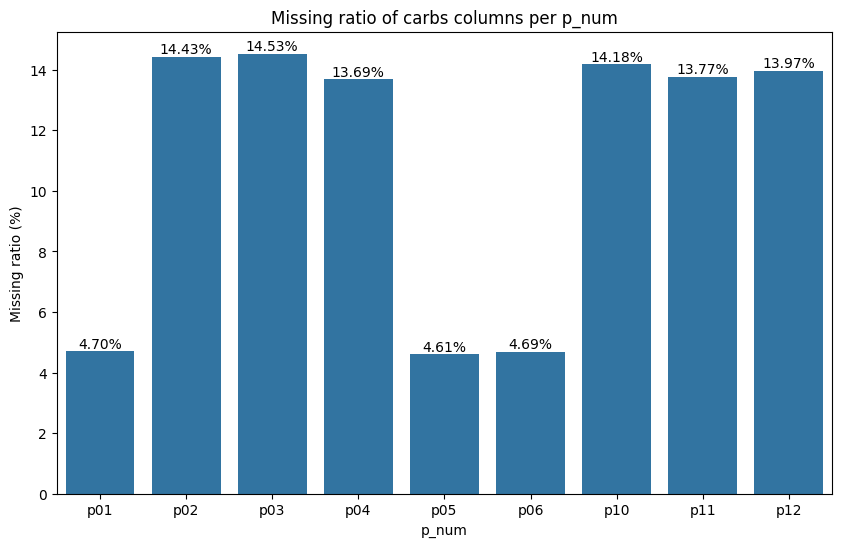

In [10]:
carbs_cols = [col for col in train.columns if col.startswith('carbs-')]
plot_missing_ratio(train, carbs_cols, 'p_num', 'carbs')

#### hr NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


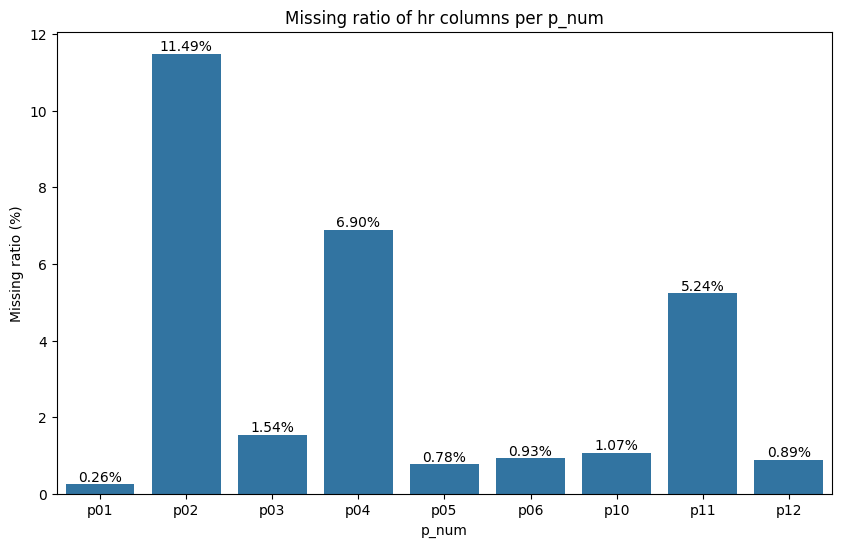

In [11]:
hr_cols = [col for col in train.columns if col.startswith('hr-')]
plot_missing_ratio(train, hr_cols, 'p_num', 'hr')

#### steps NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


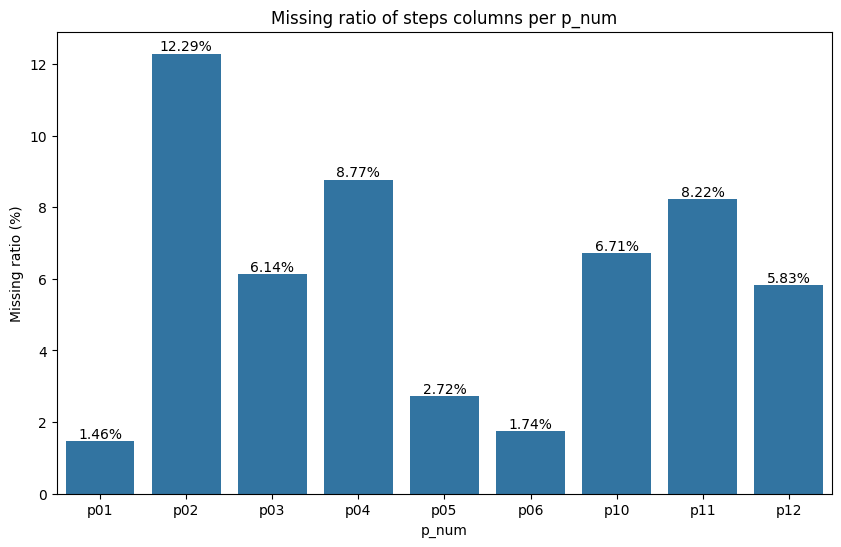

In [17]:
steps_cols = [col for col in train.columns if col.startswith('steps-')]
plot_missing_ratio(train, steps_cols, 'p_num', 'steps')

#### cals NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


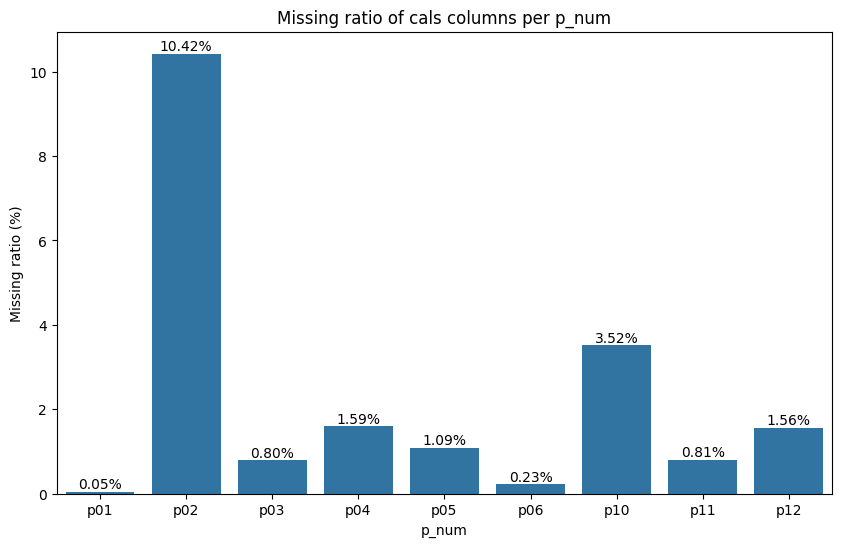

In [15]:
cals_cols = [col for col in train.columns if col.startswith('cals-')]
plot_missing_ratio(train, cals_cols, 'p_num', 'cals')

#### activity NaN visualisation

/tmp/ipykernel_12960/1047826626.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ratio_per_group = df.groupby(group_by_col).apply(calc_missing_ratio_per_group)


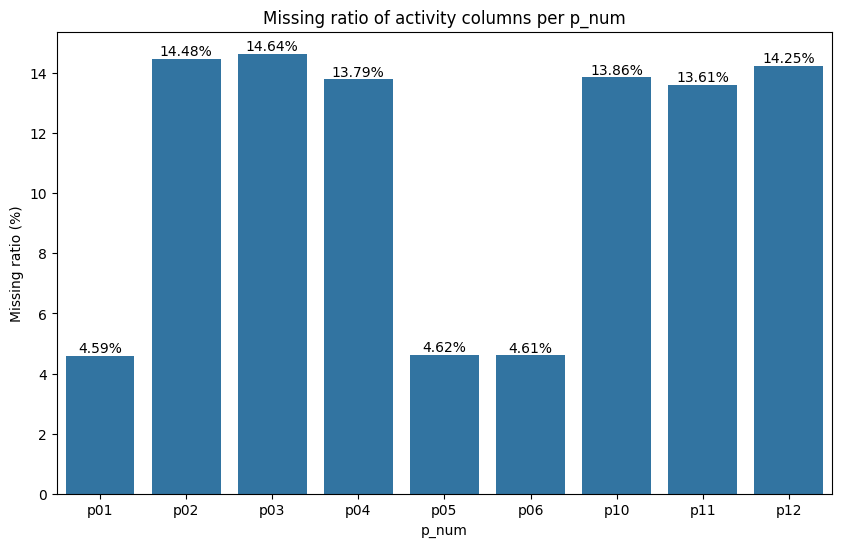

In [18]:
activity_cols = [col for col in train.columns if col.startswith('activity-')]   
plot_missing_ratio(train, activity_cols, 'p_num', 'activity')